# Homework 6 for Perspective
## Qian Zhang

In [1]:
# import libraries

import numpy as np
import pandas as pd
import scipy.stats as sts
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Question 1
### (a)

In [2]:
# import the data

df=pd.read_csv('data/Auto.csv',na_values='?')

# drop the missing value

df.dropna(inplace=True)

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


### (b)

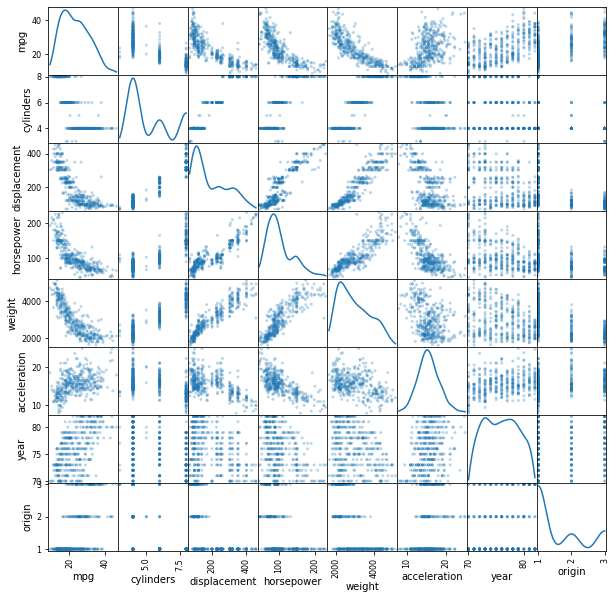

In [3]:
# draw the scatter matrix

from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.3, figsize=(10, 10),diagonal='kde')
plt.show()

### (c)

In [4]:
# print the corr matrix

df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


### (d) 

In [5]:
# run the regression

df['constant']=1
reg = sm.OLS(endog=df['mpg'], exog=df[['constant','cylinders','displacement','horsepower','weight','acceleration','year','origin']], missing='drop')

In [6]:
# print the result

results = reg.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Wed, 19 Feb 2020   Prob (F-statistic):          2.04e-139
Time:                        01:05:45   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
constant       -17.2184      4.644     -3.707   

### (d) i.

From the table, the coefficients of `displacement`, `weight`, `year` and `origin` are statistically significant at 1% level.

### (d) ii.

From the table, the coefficients of `cylinders`, `horsepower` and `acceleration` are not statistically significant at 10% level.

### (d) iii.

Given all other variables fixed, if the vehicle year increases by 1 unit, the predicted miles per gallon is expected to increase by 0.7508 unit averagely.

### (e)

From the scatter matrix, the variables of `displacement`, `horsepower` and `weight` are likely to have nonlinear relationship with `mpg`.

### (e) i.

In [7]:
# create the squared values

df['displacement_sq'] = df['displacement'] ** 2
df['horsepower_sq'] = df['horsepower'] ** 2
df['weight_sq'] = df['weight'] ** 2
df['acceleration_sq'] = df['acceleration'] ** 2

In [8]:
#regression on nonlinear

df['constant']=1
reg_2 = sm.OLS(endog=df['mpg'], exog=df[['constant','cylinders','displacement_sq','displacement','horsepower_sq','horsepower','weight_sq','weight','acceleration_sq','acceleration','year','origin']], missing='drop')

In [9]:
results_2 = reg_2.fit()
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.2
Date:                Wed, 19 Feb 2020   Prob (F-statistic):          1.75e-160
Time:                        01:05:46   Log-Likelihood:                -962.02
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     380   BIC:                             1996.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
constant           20.1084      6.696     

### (e) ii. 

The adjusted R-squared for the estimation above is 0.866, which is better than 0.818, the adjusted R-squared in (d).

### (e) iii.

From the check the p values, the coefficient of `displacement` is no longer siginificant at 1% level, and in the new estimation, the coefficients of both `displacement` and `displacement_sq` are not significant even at 10% level.

### (e) iv.

The p value of `cylinders` rises from 0.128 to 0.440, and it never becomes significant at 10% level. 

### (f)

In [10]:
# predict the mpg

mpg_pred=results_2.predict(exog=[1, 6, 200**2, 200, 100**2, 100, 3100**2, 3100, 15.1**2, 15.1, 99, 1])
print('The predicted value of mpg is {}.'.format(mpg_pred[0]))

The predicted value of mpg is 38.73211109740114.


## Question 2

In [11]:
# load the training data

df2=pd.DataFrame([[0, 3, 0, 'Red'],
                  [2, 0, 0, 'Red'],
                  [0, 1, 3, 'Red'],
                  [0, 1, 2, 'Green'],
                  [-1, 0, 1, 'Green'],
                  [1, 1, 1, 'Red']])

df2.columns=('X1','X2','X3','Y')
df2.index+=1

df2

,X1,X2,X3,Y
1,0,3,0,Red
2,2,0,0,Red
3,0,1,3,Red
4,0,1,2,Green
5,-1,0,1,Green
6,1,1,1,Red


### (a)

In [12]:
# calculate the Euclidean distance

df2['Eucl distance']=np.sqrt((df2['X1']-0)**2+(df2['X2']-0)**2+(df2['X3']-0)**2)
df2

,X1,X2,X3,Y,Eucl distance
1,0,3,0,Red,3.000000
2,2,0,0,Red,2.000000
3,0,1,3,Red,3.162278
4,0,1,2,Green,2.236068
5,-1,0,1,Green,1.414214
6,1,1,1,Red,1.732051


The Euclidean distance from obs 1 to 6 is: $3$, $2$, $\sqrt{10}$,$\sqrt{5}$,$\sqrt{2}$,$\sqrt{3}$.

### (b)

When $K=1$, the nearest neighbor is the 5th obs with the distance of $\sqrt{2}$. Therefore, the KNN prediction would be Green.

### (c)

When $K=3$, the 3 nearest neighbors are the 2nd, 5th and 6th obs, with the distance of $2$, $\sqrt{2}$ and $\sqrt{3}$. Their Y values are Red, Green and Red. Therefore, since $Pr(Red)=\frac{2}{3}, Pr(Green)=\frac{1}{3}$, the KNN prediction would be Red.

### (d)

If the Bayes (optimal) decision boundary in this problem is highly non-linear, then the best K is expected to be small, since as K increases, the boundary will be more inflexible, and the variance will go larger. Also, if the K is large, some flexible non-linear trends in the data may not be captured. Therefore, a small K should be picked.

### (e)

In [13]:
# set the input

X_2 = df2[['X1','X2','X3']]
Y_2 = df2['Y']

# estimation

knn_model = KNeighborsClassifier(n_neighbors=2,weights='uniform')
result_knn = knn_model.fit(X_2, Y_2)
print('The KNN classifier of the test point is: {}.'.format(result_knn.predict([[1,1,1]])[0]))

The KNN classifier of the test point is: Green.


## Question 3

In [14]:
# create mpg_high

df['mpg_high']=(df['mpg']>=df['mpg'].median()).astype('int')
print('The median of mpg is {}.'.format(df['mpg'].median()))
df['mpg_high'].describe()

The median of mpg is 22.75.


count    392.000000
mean       0.500000
std        0.500639
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000
Name: mpg_high, dtype: float64

### (a)

In [15]:
# estimate the logistic regression

reg_logit = sm.Logit(endog=df['mpg_high'], exog=df[['constant','cylinders','displacement','horsepower','weight','acceleration','year','origin']], missing='drop')
result_logit=reg_logit.fit()
print(result_logit.summary())

Optimization terminated successfully.
         Current function value: 0.200944
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               mpg_high   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Wed, 19 Feb 2020   Pseudo R-squ.:                  0.7101
Time:                        01:05:46   Log-Likelihood:                -78.770
converged:                       True   LL-Null:                       -271.71
Covariance Type:            nonrobust   LLR p-value:                 2.531e-79
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
constant       -17.1549      5.764     -2.976      0.003     -28.452      -5.858
cylinders       -0.1626

From the p values, the coefficients of regressor `weight` and `year` are significant at 5% level.

### (b)

In [16]:
# split the data

y = df['mpg_high']
X = df[['cylinders','displacement','horsepower','weight','acceleration','year','origin']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=10)

In [17]:
# estimate the training data

logit_train = LogisticRegression().fit(X_train, y_train)

/Users/timqzhang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [18]:
# report the coefficients

coef=pd.concat([pd.DataFrame(X.columns,columns=["Variables"]),
                 pd.DataFrame(np.transpose(logit_train.coef_),columns=["Coefficient"])],axis = 1)
coef.append(pd.DataFrame([['constant',logit_train.intercept_[0]]], columns=["Variables",'Coefficient']),ignore_index=True)

,Variables,Coefficient
0,cylinders,-0.670904
1,displacement,0.005916
2,horsepower,-0.038426
3,weight,-0.005022
4,acceleration,-0.139044
5,year,0.299140
6,origin,-0.153165
7,constant,-0.069949


### (d)

In [19]:
# predict the test data

y_pred = logit_train.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0])

In [20]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

print("\nClassification report:")
print(classification_report(y_test, y_pred))

Confusion matrix:
[[86 13]
 [12 85]]

Classification report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87        99
           1       0.87      0.88      0.87        97

    accuracy                           0.87       196
   macro avg       0.87      0.87      0.87       196
weighted avg       0.87      0.87      0.87       196



Since we have seen that predictions on mpg_high=0 and 1 have the same f1-score, we can say that it predicts equally well. 